In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r as sim
from TO_sim.Utility import Create_Folder
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf as func
from TO_sim.gen_Distribution import Normal
import parmap
import pandas as pd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [17]:
N =500
theta,omega,Kc = Normal(N,0,1,seed=10)
omega = np.sort(omega)
theta0 = np.ones_like(theta)
dt = 0.1

m = 6
t = np.arange(0,1000+dt/2,dt)
K = 2.5
rs = sim(K,N=N,m=m,t_array=t,p_theta=theta,p_dtheta= omega,p_omega=omega)

In [ ]:
Ks = np.arange(1,15,0.1)

In [ ]:
df = pd.DataFrame({'theta':np.zeros_like(Ks),'dtheta':np.zeros_like(Ks)},index=Ks,dtype=object)
# rdf = pd.DataFrame({'theta':np.zeros_like(Ks),'dtheta':np.zeros_like(Ks)},index=Ks,dtype=object)

for i,(K,(df.theta[K],df.dtheta[K])) in enumerate(zip(Ks,parmap.map(sim,Ks,N=N,m=m,t_array=t,p_theta=theta,p_dtheta= omega,p_omega=omega,pm_processes=15,pm_pbar=True))):pass
# for i,(K,(rdf.theta[K],rdf.dtheta[K])) in enumerate(zip(Ks,parmap.map(sim,Ks,N=N,m=m,t_array=t,p_theta=theta0,p_dtheta= np.zeros_like(omega),p_omega=omega,pm_processes=15,pm_pbar=True))):pass


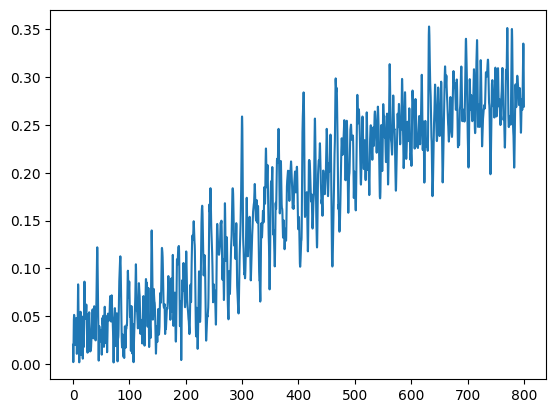

In [16]:
plt.plot(t,rs)